In [1]:
!pip install wordcloud

In [62]:
import numpy as np
import pandas as pd
import gensim # open-source library for unsupervised topic modeling and NLP
from gensim.utils import simple_preprocess
import nltk # Natural Language Toolkit is a library to work with human language data
from nltk.corpus import stopwords 
import gensim.corpora as corpora
import plotly.io as pio
pio.templates.default = 'plotly_white'
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.express as px 
from plotly.offline import iplot
import plotly.io as pio
pio.templates.default = 'plotly_white'

/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:22: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion(duck_array_module.__version__)
/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  duck_array_version = LooseVersion("0.0.0")
/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/xarray/core/pycompat.py:37

In [3]:
traindata = pd.read_csv('/Users/aneezaslam/Desktop/Assessments/Modelling Dataset/train.csv')

In [4]:
traindata

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,WC9370727,2004-08-21T18:00:00Z,2004-09-08T00:00:00Z,32,F,S,0,0,500.00,F,38.0,5,STRUCK KNIFE LACERATED LEFT MIDDLE FINGER LEFT...,1000,480.493308
53996,WC8396269,2002-04-28T09:00:00Z,2002-09-03T00:00:00Z,20,F,S,0,0,500.00,F,40.0,5,LEFT HAND LACERATION LEFT SIDE BACK AND LEFT LEG,1000,755.735319
53997,WC3609528,1992-02-28T09:00:00Z,1992-03-18T00:00:00Z,19,M,S,0,0,283.00,F,40.0,5,METAL SLIPPED ACROSS METAL CUT FINGER,210,418.178461
53998,WC5038565,1995-01-10T07:00:00Z,1995-01-31T00:00:00Z,24,M,S,0,0,200.00,F,38.0,5,BURN WHILST USING SPANNER LACERATION RIGHT MID...,7500,2695.225700


In [5]:
claimdata = traindata[['ClaimNumber', 'DateTimeOfAccident', 'ClaimDescription', 'InitialIncurredCalimsCost', 'UltimateIncurredClaimCost']].copy()




In [6]:
claimdata['DateTimeOfAccident'] = pd.to_datetime(claimdata['DateTimeOfAccident'])
claimdata['DateTimeOfAccident'] = claimdata['DateTimeOfAccident'].dt.year

/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



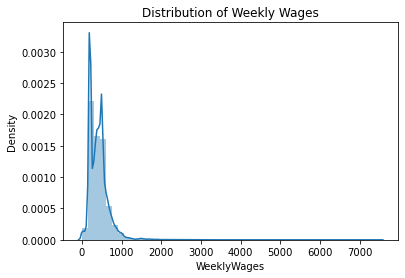

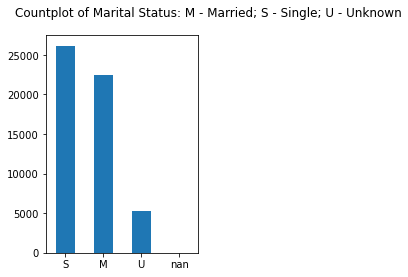

In [74]:

plt.suptitle('Countplot of Marital Status: M - Married; S - Single; U - Unknown') 
plt.subplot(1, 2, 1) 
traindata['MaritalStatus'].value_counts(dropna = False).plot(kind = 'bar', rot = 0);

In [68]:
from plotly.offline import iplot

In [7]:
claimdata

,ClaimNumber,DateTimeOfAccident,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8285054,2002,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6982224,1999,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5481426,1996,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9775968,2005,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2634037,1990,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
...,...,...,...,...,...
53995,WC9370727,2004,STRUCK KNIFE LACERATED LEFT MIDDLE FINGER LEFT...,1000,480.493308
53996,WC8396269,2002,LEFT HAND LACERATION LEFT SIDE BACK AND LEFT LEG,1000,755.735319
53997,WC3609528,1992,METAL SLIPPED ACROSS METAL CUT FINGER,210,418.178461
53998,WC5038565,1995,BURN WHILST USING SPANNER LACERATION RIGHT MID...,7500,2695.225700


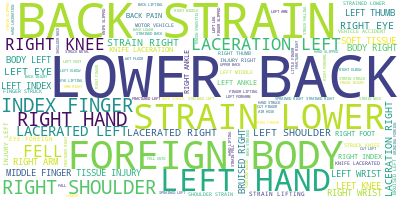

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different descriptions together
long_string = ','.join(list(claimdata['ClaimDescription'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3, contour_color = 'steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [10]:
# Storing a list of stopwords
nltk.download('stopwords') # start the NLTK Downloader and download the stopwords

stop_words = stopwords.words('english') # Selecting english stopwords
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # adding new stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aneezaslam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Defining a function to convert our descriptions to word tokens and remove ponctuation
def sent_to_words(descriptions):
    i = 0
    for description in descriptions:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(description), deacc=True)) 

In [12]:
# Defining a function to remove stopwords    
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [13]:
new_data = claimdata.ClaimDescription.values.tolist()
data_words = list(sent_to_words(new_data))
data_words = remove_stopwords(data_words)

print(data_words[0]) #Showing the first description split into tokens

['lifting', 'tyre', 'injury', 'right', 'arm', 'wrist', 'injury']


In [14]:

# Create Dictionary
idtoword = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words

# Term Document Frequency
# Converts a collection of words to  a list of (word_id, word_frequency) 2-tuples.
corpus = [idtoword.doc2bow(text) for text in texts]

# View first description
print(corpus[0])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1)]


In [15]:
from pprint import pprint
# number of topics
numoftopics = 10
# Build LDA model
ldamodel = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = idtoword,
                                       num_topics = numoftopics,
                                       random_state = 0)
# Print the Keyword in the 10 topics
pprint(ldamodel.print_topics())
doc_lda = ldamodel[corpus]

[(0,
  '0.108*"left" + 0.056*"strain" + 0.052*"lifting" + 0.048*"back" + '
  '0.039*"cut" + 0.035*"lower" + 0.028*"finger" + 0.019*"thumb" + 0.019*"arm" '
  '+ 0.018*"laceration"'),
 (1,
  '0.109*"left" + 0.053*"hand" + 0.037*"right" + 0.037*"knee" + '
  '0.033*"foreign" + 0.032*"back" + 0.032*"body" + 0.031*"eye" + '
  '0.028*"strained" + 0.025*"wrist"'),
 (2,
  '0.138*"back" + 0.101*"lower" + 0.059*"strain" + 0.051*"lifting" + '
  '0.047*"strained" + 0.023*"right" + 0.017*"left" + 0.015*"pain" + '
  '0.015*"twisted" + 0.013*"shoulder"'),
 (3,
  '0.165*"right" + 0.041*"hand" + 0.030*"eye" + 0.027*"slipped" + 0.027*"body" '
  '+ 0.027*"foreign" + 0.027*"shoulder" + 0.024*"left" + 0.019*"foot" + '
  '0.019*"fell"'),
 (4,
  '0.100*"right" + 0.046*"left" + 0.038*"bruised" + 0.036*"struck" + '
  '0.028*"laceration" + 0.027*"thumb" + 0.021*"fell" + 0.018*"hit" + '
  '0.018*"foot" + 0.018*"lacerated"'),
 (5,
  '0.056*"ankle" + 0.047*"back" + 0.046*"neck" + 0.042*"right" + 0.041*"left" '
  '+

In [16]:


pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:

import pickle 
import pyLDAvis

In [19]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [20]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(numoftopics))

In [21]:
LDAvis_data_filepath

'./ldavis_prepared_10'

In [22]:
!pip install gensim
!pip install pyldavis

In [23]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, corpus, idtoword)
lda_viz

/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/aneezaslam/opt

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.124793 -0.002170       1        1  14.583162
3     -0.099222 -0.103746       2        1  14.504061
7     -0.121350  0.090566       3        1  12.668374
1     -0.028954 -0.089750       4        1  11.487611
2      0.173453  0.003517       5        1  10.303201
4     -0.074958 -0.012395       6        1   8.810650
5      0.076704  0.003698       7        1   8.656078
8     -0.081798  0.053215       8        1   8.120022
0      0.012603  0.027760       9        1   5.758605
9      0.018728  0.029304      10        1   5.108235, topic_info=        Term          Freq         Total Category  logprob  loglift
18      back  17325.000000  17325.000000  Default  30.0000  30.0000
21    strain  15397.000000  15397.000000  Default  29.0000  29.0000
20     lower  10678.000000  10678.000000  Default  28.0000  28.0000
3      right  20834.000000  20834.000000  Default  27.0000  27.0000
10      left  19809.000000  19809.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
109     neck    199.481569   3747.533212  Topic10  -4.4813   0.0412
32   bruised    138.160880   3301.483738  Topic10  -4.8486  -0.1994
36      hand    154.667889   7099.788196  Topic10  -4.7358  -0.8522
83       hit    128.412733   2738.287638  Topic10  -4.9218  -0.0855
92      fell    132.491088   5879.114510  Topic10  -4.8905  -0.8183

[811 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
42        1  0.102432  abrasion
42        2  0.134093  abrasion
42        3  0.014899  abrasion
42        4  0.115469  abrasion
42        5  0.024211  abrasion
...     ...       ...       ...
5         6  0.045319     wrist
5         7  0.042897     wrist
5         8  0.025946     wrist
5         9  0.088216     wrist
5        10  0.039438     wrist

[2632 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 8, 2, 3, 5, 6, 9, 1, 10])

In [26]:
stop_words.extend(['left', 'right']) # adding new stopwords

In [28]:
data_wrl = claimdata.ClaimDescription.values.tolist()
data_words_wrl = list(sent_to_words(data_wrl))
data_words_wrl = remove_stopwords(data_words_wrl)

In [29]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_wrl)
# Create Corpus
texts = data_words_wrl

In [31]:
# Term Document Frequency
# Converts a collection of words to  a list of (word_id, word_frequency) 2-tuples.
corpus = [id2word.doc2bow(text) for text in texts]

# View first description
print(data_words_wrl[0])

['lifting', 'tyre', 'injury', 'arm', 'wrist', 'injury']


In [32]:
print(corpus[0])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1)]


In [33]:
numoftopics = 15
# Build LDA model
ldamodel = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = id2word,
                                       num_topics = numoftopics,
                                       random_state = 0)
# Print the Keyword in the 10 topics
pprint(ldamodel.print_topics())
doc_lda = ldamodel[corpus]


[(0,
  '0.068*"back" + 0.049*"lifting" + 0.037*"strained" + 0.030*"pain" + '
  '0.027*"body" + 0.027*"foreign" + 0.026*"eye" + 0.024*"arm" + 0.022*"lower" '
  '+ 0.021*"finger"'),
 (1,
  '0.086*"shoulder" + 0.080*"strain" + 0.056*"neck" + 0.036*"back" + '
  '0.029*"forearm" + 0.028*"struck" + 0.027*"lifting" + 0.024*"lower" + '
  '0.022*"accident" + 0.020*"vehicle"'),
 (2,
  '0.070*"strain" + 0.068*"ankle" + 0.068*"shoulder" + 0.037*"slipped" + '
  '0.030*"sprained" + 0.026*"fell" + 0.026*"knee" + 0.023*"lifting" + '
  '0.020*"hit" + 0.019*"lacerated"'),
 (3,
  '0.135*"strain" + 0.132*"back" + 0.097*"lower" + 0.070*"lifting" + '
  '0.032*"shoulder" + 0.021*"knee" + 0.021*"strained" + 0.021*"injury" + '
  '0.019*"neck" + 0.010*"wrist"'),
 (4,
  '0.122*"back" + 0.074*"strain" + 0.067*"lower" + 0.057*"fell" + '
  '0.032*"slipped" + 0.028*"lifting" + 0.026*"knee" + 0.020*"floor" + '
  '0.019*"foot" + 0.018*"leg"'),
 (5,
  '0.074*"foot" + 0.035*"struck" + 0.029*"laceration" + 0.027*"bruised

In [34]:
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(numoftopics))

In [35]:
lda_viz = gensimvis.prepare(ldamodel, corpus, id2word)
lda_viz

/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/aneezaslam/opt

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.178072  0.036852       1        1  14.273469
7      0.156464  0.122138       2        1   9.441665
13     0.083293  0.046806       3        1   8.253237
12     0.060195 -0.108874       4        1   7.452582
8     -0.062868  0.010326       5        1   7.245744
1     -0.095327 -0.029524       6        1   7.086123
2     -0.056351 -0.050793       7        1   7.081871
4     -0.100529  0.001957       8        1   5.779659
5      0.119998  0.011122       9        1   5.490585
6      0.045550  0.114684      10        1   5.270561
9      0.076936 -0.177771      11        1   5.256966
10    -0.100765  0.117523      12        1   5.230684
14    -0.008266 -0.126098      13        1   4.686973
11     0.070321  0.043629      14        1   4.250226
0     -0.010580 -0.011978      15        1   3.199655, topic_info=        Term          Freq         Total Category  logprob  loglift
31    finger   8552.000000   8552.000000  Default  30.0000  30.0000
16      back  15358.000000  15358.000000  Default  29.0000  29.0000
19    strain  14667.000000  14667.000000  Default  28.0000  28.0000
57   foreign   3632.000000   3632.000000  Default  27.0000  27.0000
42       eye   5237.000000   5237.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
75   twisted     68.136209   1530.670789  Topic15  -4.9533   0.3302
24  shoulder     99.055296   6558.433300  Topic15  -4.5791  -0.7507
1     injury     79.185803   4175.162181  Topic15  -4.8030  -0.5230
19    strain     95.345261  14667.810840  Topic15  -4.6173  -1.5938
39   slipped     81.424909   6000.568525  Topic15  -4.7751  -0.8578

[1169 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2405     12  0.708919   abalone
40        1  0.058214  abrasion
40        2  0.102844  abrasion
40        3  0.044631  abrasion
40        4  0.275545  abrasion
...     ...       ...       ...
4        13  0.037756     wrist
4        14  0.023529     wrist
4        15  0.031737     wrist
1455      9  0.851734     wrong
2585     15  0.427216      yard

[4462 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 14, 13, 9, 2, 3, 5, 6, 7, 10, 11, 15, 12, 1])

In [36]:
def format_topics_sentences(ldamodel = ldamodel, corpus = corpus, texts = new_data):
    # Init output
    sent_topics_df = pd.DataFrame()
    
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index = True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [38]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=new_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(20)

/var/folders/fq/gg8p1x8j4vs342t_csl4_0jm0000gn/T/ipykernel_6714/3362444646.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/fq/gg8p1x8j4vs342t_csl4_0jm0000gn/T/ipykernel_6714/3362444646.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8,0.6409,"knee, back, injury, lower, fell, lifting, stru...",LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY
1,1,11,0.5712,"hand, struck, lacerated, back, finger, fell, l...",STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...
2,2,13,0.8444,"hand, laceration, thumb, struck, cut, strain, ...",CUT ON SHARP EDGE CUT LEFT THUMB
3,3,3,0.8667,"strain, back, lower, lifting, shoulder, knee, ...",DIGGING LOWER BACK LOWER BACK STRAIN
4,4,1,0.8963,"shoulder, strain, neck, back, forearm, struck,...",REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...
5,5,13,0.8444,"hand, laceration, thumb, struck, cut, strain, ...",STRUCK HEAD ON HEAD LACERATED HEAD
6,6,5,0.8133,"foot, struck, laceration, bruised, hand, finge...",FINGER BRUISED AND SWOLLEN LEFT ARM
7,7,13,0.8133,"hand, laceration, thumb, struck, cut, strain, ...",CLEANING LEFT SHOULDER SPLINTER LEFT HAND
8,8,6,0.8833,"finger, laceration, back, strain, hand, struck...",JACK SLIPPED CATCHING FINGER CUT LEFT LITTLE F...
9,9,12,0.6490,"eye, foreign, body, fell, metal, hand, injury,...",STRUCK PINE DUST ABRASION LEFT EYE IRRITATION


In [39]:
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8,0.6409,"knee, back, injury, lower, fell, lifting, stru...",LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY
1,1,11,0.5712,"hand, struck, lacerated, back, finger, fell, l...",STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...
2,2,13,0.8444,"hand, laceration, thumb, struck, cut, strain, ...",CUT ON SHARP EDGE CUT LEFT THUMB
3,3,3,0.8667,"strain, back, lower, lifting, shoulder, knee, ...",DIGGING LOWER BACK LOWER BACK STRAIN
4,4,1,0.8963,"shoulder, strain, neck, back, forearm, struck,...",REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...
5,5,13,0.8444,"hand, laceration, thumb, struck, cut, strain, ...",STRUCK HEAD ON HEAD LACERATED HEAD
6,6,5,0.8133,"foot, struck, laceration, bruised, hand, finge...",FINGER BRUISED AND SWOLLEN LEFT ARM
7,7,13,0.8133,"hand, laceration, thumb, struck, cut, strain, ...",CLEANING LEFT SHOULDER SPLINTER LEFT HAND
8,8,6,0.8833,"finger, laceration, back, strain, hand, struck...",JACK SLIPPED CATCHING FINGER CUT LEFT LITTLE F...
9,9,12,0.6490,"eye, foreign, body, fell, metal, hand, injury,...",STRUCK PINE DUST ABRASION LEFT EYE IRRITATION


In [76]:
from gensim.models import LsiModel
from sklearn.decomposition import TruncatedSVD

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
import scipy.stats as stats

from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

from sklearn.feature_extraction.text import CountVectorizer


from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



Loading BokehJS ...

/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



In [88]:
lsadata = pd.read_csv('/Users/aneezaslam/Desktop/Assessments/Modelling Dataset/train.csv')

In [90]:
lsadata2 = lsadata['ClaimDescription']
lsadata2.index = lsadata['ClaimNumber']
lsadata2.sample(10) 


ClaimNumber
WC7732590           LIFTING PIANO LOWER BACK STRAIN LOWER BACK
WC4333205                FELL OFF LADDER LACERATION LEFT THUMB
WC9758559                      FALL GRAVE STRAIN LEFT SHOULDER
WC8885505                     DRIVING ON TO HEAD ABRASION HEAD
WC9250157                   LIFTING RESIDENT LOWER BACK STRAIN
WC2587272    MOTOR VEHICLE ACCIDENT CONCUSSION AND SHOULDER...
WC6200592    GRINDING IN EYE WHILE GRINDING CORNEAL FOREIGN...
WC8178892             SLIPPED AND TWISTED ANKLE SPRAINED ANKLE
WC2458708         HIT HEAD ON FREEZER LACERATION TO RIGHT KNEE
WC6399707                      FELL FROM LADDER RIGHT SHOULDER
Name: ClaimDescription, dtype: object

In [93]:
def get_top_n_words(ntopwords, count_vectorizer, text_data):
    '''
    This will return a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vec_claims = count_vectorizer.fit_transform(text_data.values)
    vec_total = np.sum(vec_claims, axis=0)
    word_indices = np.flip(np.argsort(vec_total)[0,:], 1)
    word_values = np.flip(np.sort(vec_total)[0,:],1)
    
    word_vec = np.zeros((ntopwords, vec_claims.shape[1]))
    for i in range(ntopwords):
        word_vec[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vec)]

    return (words, word_values[0,:ntopwords].tolist()[0])

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(ntopwords=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=lsadata2)

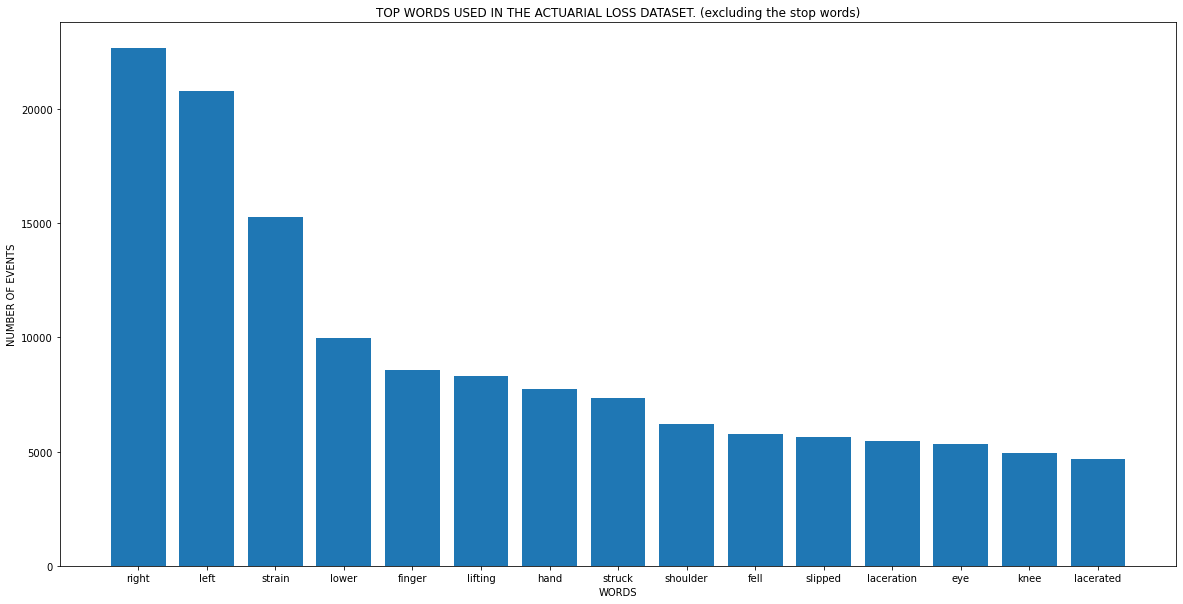

In [94]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='horizontal');
ax.set_title('TOP WORDS USED IN THE ACTUARIAL LOSS DATASET. (excluding the stop words)');
ax.set_xlabel('WORDS');
ax.set_ylabel('NUMBER OF EVENTS');
plt.show()

In [95]:
smallcountvec = CountVectorizer(stop_words='english', max_features=40000)
smalltextsam = lsadata2.sample(n=10000, random_state=0).values

print('CLAIM DESCRIPTION BEFORE VECTORIZATION: {}'.format(smalltextsam[123]))

smalldocterm_matrix = smallcountvec.fit_transform(smalltextsam)

print('DESCRIPTION AFTER VECTORIZATION: \n{}'.format(smalldocterm_matrix[123]))

CLAIM DESCRIPTION BEFORE VECTORIZATION: JAMMED FINGER IN MACHINE BRUISED BACK RIGHT SHOULDER INJURY
DESCRIPTION AFTER VECTORIZATION: 
  (0, 1507)	1
  (0, 623)	1
  (0, 1380)	1
  (0, 857)	1
  (0, 1006)	1
  (0, 194)	1
  (0, 878)	1


In [96]:
numoftopics_lsa = 15

In [99]:
lsamodel = TruncatedSVD(n_components=numoftopics_lsa)
lsatopic_matrix = lsa_model.fit_transform(smalldocterm_matrix)

In [100]:
# Defining the helper functions
def get_keys(topic_matrix):
    '''
    This returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    This returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [101]:
lsa_keys = get_keys(lsatopic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [102]:
# Defining the helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    This returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(numoftopics_lsa):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [103]:
lsa_topnwords = get_top_n_words(15, lsa_keys, smalldocterm_matrix, smallcountvec)

for i in range(len(lsa_topnwords)):
    print("Topic {}: ".format(i+1), lsa_topnwords[i])

Topic 1:  right left finger hand struck lacerated shoulder wrist laceration strain knee fell slipped thumb bruised
Topic 2:  strain lower lifting neck right upper shoulder slipped fell repetitive parts low muscle bending truck
Topic 3:  strain lower lifting left shoulder tyres strained neck pain muscle heavy boxes piano pulling steel
Topic 4:  eye foreign body left right grinding metal cornea particle using grinder struck slipped lathe welding
Topic 5:  finger index cut laceration right left caught struck lacerated middle knife slipped metal cutting ring
Topic 6:  hand left laceration struck right knife cut face bruising burn slipped hot lacerated burned bruised
Topic 7:  lower lifting strained pain injury fell soft tissue slipped foot twisted truck bruised left floor
Topic 8:  fell strain slipped knee left ladder floor bruised ankle wet stairs multiple hand low neck
Topic 9:  struck lacerated injury thumb left soft tissue hit head lip air hose right metal falling
Topic 10:  injury sof

In [106]:
tsne_lsamodel = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsavectors = tsne_lsamodel.fit_transform(lsatopic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.009s...


/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



[t-SNE] Computed neighbors for 10000 samples in 1.341s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.539612
[t-SNE] KL divergence after 2000 iterations: 0.571425


In [111]:
# Defining the helper functions
def get_mean_topic_vectors(keys, twodim_vectors):
    '''
    This returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(numoftopics_lsa):
        claims_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                claims_in_that_topic.append(twodim_vectors[i])    
        
        claims_in_that_topic = np.vstack(claims_in_that_topic)
        mean_claims_in_that_topic = np.mean(claims_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_claims_in_that_topic)
    return mean_topic_vectors

In [112]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:numoftopics_lsa]

In [113]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, smalldocterm_matrix, smallcountvec)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsavectors)

plot = figure(title="t-SNE CLUSTERING OF {} LSA TOPICS".format(numoftopics_lsa), plot_width=900, plot_height=1000)
plot.scatter(x=tsne_lsavectors[:,0], y=tsne_lsavectors[:,1], color=colormap[lsa_keys])

for t in range(numoftopics_lsa):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.



/Users/aneezaslam/opt/anaconda3/lib/python3.9/site-packages/bokeh/io/notebook.py:487: DeprecationWarning:

The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.

